REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude

## Simple Harmonic Motion Example

Let's consider a mass-spring system with:
- Mass (m) = 1 kg
- Spring constant (k) = 4 N/m
- Initial displacement (x₀) = 0.5 m
- Initial velocity (v₀) = 0 m/s

### Step 1: Setup the Differential Equation
- From Newton's Second Law and Hooke's Law:
  - F = ma = -kx
  - $m\frac{d^2x}{dt^2} = -kx$
  - $\frac{d^2x}{dt^2} + \frac{k}{m}x = 0$
  - $\frac{d^2x}{dt^2} + 4x = 0$ (substituting our values)

### Step 2: Solve the Characteristic Equation
- For solutions of form x = e^(rt)
- r² + 4 = 0
- r = ±2i
- Angular frequency ω = 2 rad/s

### Step 3: General Solution
- x(t) = A cos(2t) + B sin(2t)
  where A and B are constants determined by initial conditions

### Step 4: Apply Initial Conditions
1. At t = 0, x = 0.5 m:
   - 0.5 = A cos(0) + B sin(0)
   - 0.5 = A

2. At t = 0, v = 0 m/s:
   - v(t) = dx/dt = -2A sin(2t) + 2B cos(2t)
   - 0 = -2A sin(0) + 2B cos(0)
   - 0 = 2B
   - B = 0

### Step 5: Final Solution
- x(t) = 0.5 cos(2t)

### Analysis:
1. **Period** (T):
   - T = 2π/ω = π seconds

2. **Frequency** (f):
   - f = 1/T = 1/π Hz

3. **Maximum Values**:
   - Displacement: ±0.5 m
   - Velocity: ±1 m/s (max velocity occurs at x = 0)
   - Acceleration: ±2 m/s² (max at maximum displacement)

### Energy Analysis:
1. **Potential Energy** (PE):
   - PE = ½kx² = 2x² Joules
   - Maximum PE = 0.5 J (at maximum displacement)

2. **Kinetic Energy** (KE):
   - KE = ½mv² = ½m(dx/dt)² Joules
   - Maximum KE = 0.5 J (at x = 0)

3. **Total Energy**:
   - E = KE + PE = 0.5 J (constant)

This system demonstrates key SHM characteristics:
- Sinusoidal motion
- Conservation of energy
- Period independent of amplitude
- Force proportional to displacement


Tabular Data (first 10 time steps):
+----+------------+----------------+------------------+-----------------------+----------------------+------------------------+--------------------+
|    |   Time (s) |   Position (m) |   Velocity (m/s) |   Acceleration (m/s²) |   Kinetic Energy (J) |   Potential Energy (J) |   Total Energy (J) |
+====+============+================+==================+=======================+======================+========================+====================+
|  0 |     0.0000 |         0.5000 |          -0.0000 |               -2.0000 |               0.0000 |                 0.5000 |             0.5000 |
+----+------------+----------------+------------------+-----------------------+----------------------+------------------------+--------------------+
|  1 |     0.1000 |         0.4900 |          -0.1987 |               -1.9601 |               0.0197 |                 0.4803 |             0.5000 |
+----+------------+----------------+------------------+--------------

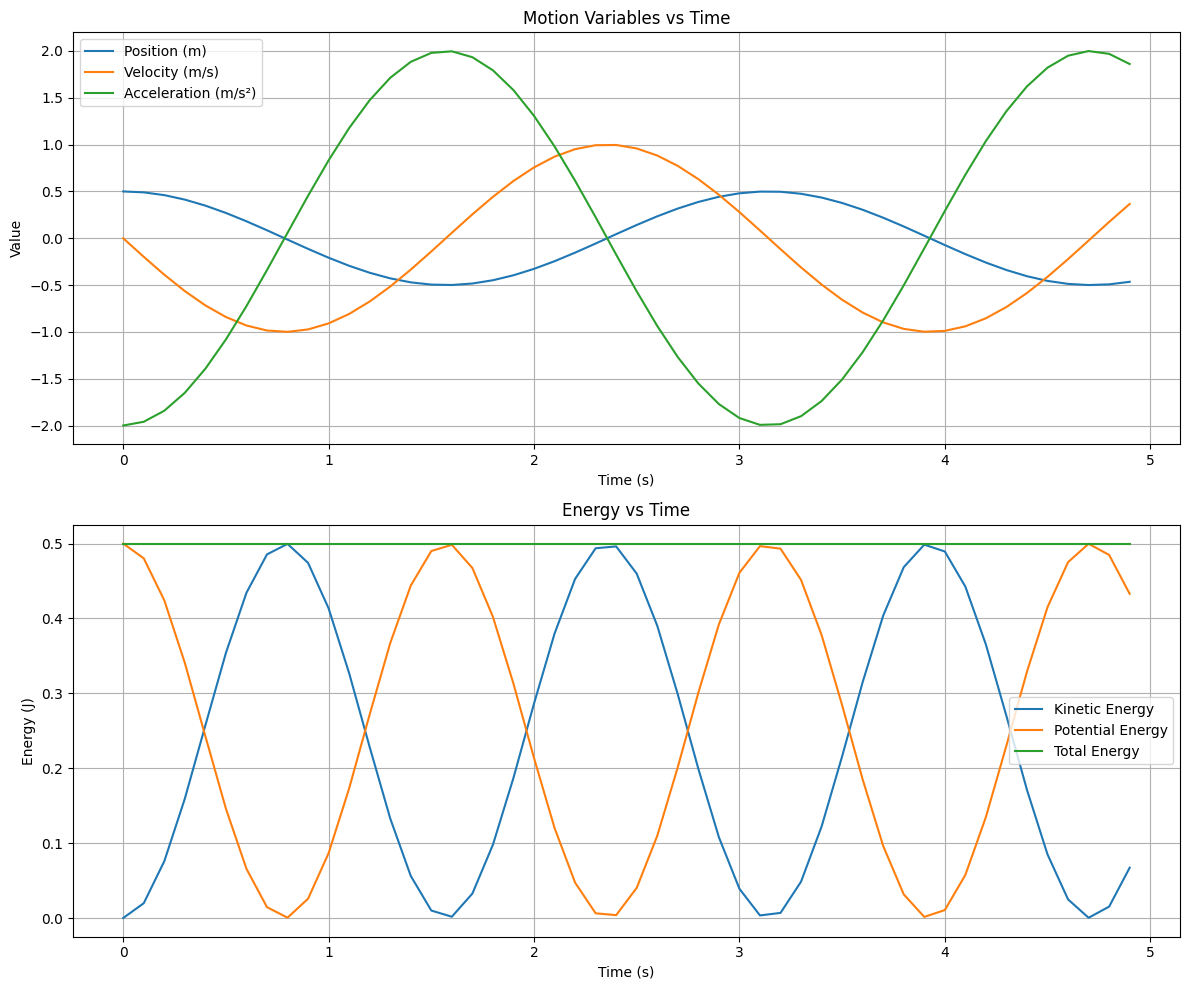


System Parameters:
Mass: 1.0 kg
Spring constant: 4.0 N/m
Initial displacement: 0.5 m
Initial velocity: 0.0 m/s
Angular frequency: 2.0000 rad/s
Period: 3.1416 s


In [1]:
"""
Simple Harmonic Motion Analysis and Visualization
-----------------------------------------------

Abstract:
This script models a mass-spring system exhibiting simple harmonic motion (SHM).
It solves the differential equation d²x/dt² + (k/m)x = 0 for given initial conditions
and generates both tabular and graphical representations of the system's motion.

Key features:
- Calculates position, velocity, acceleration
- Computes kinetic, potential, and total energy
- Generates time series data
- Creates visualizations of motion and energy
- Produces formatted tabular output

System parameters:
- Mass (m) = 1 kg
- Spring constant (k) = 4 N/m
- Initial displacement (x₀) = 0.5 m
- Initial velocity (v₀) = 0 m/s
"""

import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

# System parameters
class SHMSystem:
    def __init__(self, mass=1.0, k=4.0, x0=0.5, v0=0.0, t_max=5.0, dt=0.1):
        """Initialize the SHM system with given parameters."""
        self.mass = mass      # kg
        self.k = k            # N/m
        self.x0 = x0          # m
        self.v0 = v0          # m/s
        self.omega = np.sqrt(k/mass)  # rad/s
        self.t = np.arange(0, t_max, dt)  # time array

        # Calculate constants from initial conditions
        self.A = x0          # amplitude
        self.B = v0/self.omega  # phase constant

    def position(self, t):
        """Calculate position at time t."""
        return self.A * np.cos(self.omega * t)

    def velocity(self, t):
        """Calculate velocity at time t."""
        return -self.A * self.omega * np.sin(self.omega * t)

    def acceleration(self, t):
        """Calculate acceleration at time t."""
        return -self.A * self.omega**2 * np.cos(self.omega * t)

    def kinetic_energy(self, t):
        """Calculate kinetic energy at time t."""
        return 0.5 * self.mass * self.velocity(t)**2

    def potential_energy(self, t):
        """Calculate potential energy at time t."""
        return 0.5 * self.k * self.position(t)**2

    def total_energy(self, t):
        """Calculate total energy at time t."""
        return self.kinetic_energy(t) + self.potential_energy(t)

    def generate_data(self):
        """Generate time series data for all quantities."""
        data = {
            'Time (s)': self.t,
            'Position (m)': self.position(self.t),
            'Velocity (m/s)': self.velocity(self.t),
            'Acceleration (m/s²)': self.acceleration(self.t),
            'Kinetic Energy (J)': self.kinetic_energy(self.t),
            'Potential Energy (J)': self.potential_energy(self.t),
            'Total Energy (J)': self.total_energy(self.t)
        }
        return pd.DataFrame(data)

    def plot_motion(self):
        """Create plots for motion variables and energy."""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # Motion variables plot
        ax1.plot(self.t, self.position(self.t), label='Position (m)')
        ax1.plot(self.t, self.velocity(self.t), label='Velocity (m/s)')
        ax1.plot(self.t, self.acceleration(self.t), label='Acceleration (m/s²)')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Value')
        ax1.set_title('Motion Variables vs Time')
        ax1.grid(True)
        ax1.legend()

        # Energy plot
        ax2.plot(self.t, self.kinetic_energy(self.t), label='Kinetic Energy')
        ax2.plot(self.t, self.potential_energy(self.t), label='Potential Energy')
        ax2.plot(self.t, self.total_energy(self.t), label='Total Energy')
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Energy (J)')
        ax2.set_title('Energy vs Time')
        ax2.grid(True)
        ax2.legend()

        plt.tight_layout()
        return fig

def main():
    """Main function to run the analysis and generate outputs."""
    # Create SHM system
    shm = SHMSystem()

    # Generate data
    df = shm.generate_data()

    # Print tabular data (first 10 rows)
    print("\nTabular Data (first 10 time steps):")
    print(tabulate(df.head(10), headers='keys', tablefmt='grid', floatfmt='.4f'))

    # Create and show plots
    fig = shm.plot_motion()
    plt.show()

    # Print system parameters
    print("\nSystem Parameters:")
    print(f"Mass: {shm.mass} kg")
    print(f"Spring constant: {shm.k} N/m")
    print(f"Initial displacement: {shm.x0} m")
    print(f"Initial velocity: {shm.v0} m/s")
    print(f"Angular frequency: {shm.omega:.4f} rad/s")
    print(f"Period: {2*np.pi/shm.omega:.4f} s")

if __name__ == "__main__":
    main()